In [180]:
import pandas as pd
import numpy as np 
from zipfile import ZipFile
import seaborn as sns
import matplotlib.pyplot as plt

import sklearn 
from sklearn.model_selection import train_test_split, StratifiedShuffleSplit
from sklearn.naive_bayes import MultinomialNB
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfTransformer
from sklearn.pipeline import Pipeline 

In [176]:
sns.set_theme(context = 'notebook', style = 'darkgrid')

In [134]:
df = pd.read_csv(ZipFile("data/GoodReads_100k_books.csv.zip").open('GoodReads_100k_books.csv'))

In [135]:
df.head()

,author,bookformat,desc,genre,img,isbn,isbn13,link,pages,rating,reviews,title,totalratings
0,Laurence M. Hauptman,Hardcover,Reveals that several hundred thousand Indians ...,"History,Military History,Civil War,American Hi...",https://i.gr-assets.com/images/S/compressed.ph...,002914180X,9.78E+12,https://goodreads.com/book/show/1001053.Betwee...,0,3.52,5,Between Two Fires: American Indians in the Civ...,33
1,"Charlotte Fiell,Emmanuelle Dirix",Paperback,Fashion Sourcebook - 1920s is the first book i...,"Couture,Fashion,Historical,Art,Nonfiction",https://i.gr-assets.com/images/S/compressed.ph...,1906863482,9.78E+12,https://goodreads.com/book/show/10010552-fashi...,576,4.51,6,Fashion Sourcebook 1920s,41
2,Andy Anderson,Paperback,The seminal history and analysis of the Hungar...,"Politics,History",https://i.gr-assets.com/images/S/compressed.ph...,948984147,9.78E+12,https://goodreads.com/book/show/1001077.Hungar...,124,4.15,2,Hungary 56,26
3,Carlotta R. Anderson,Hardcover,"""All-American Anarchist"" chronicles the life a...","Labor,History",https://i.gr-assets.com/images/S/compressed.ph...,814327079,9.78E+12,https://goodreads.com/book/show/1001079.All_Am...,324,3.83,1,All-American Anarchist: Joseph A. Labadie and ...,6
4,Jean Leveille,NaN,"Aujourdâ€™hui, lâ€™oiseau nous invite Ã sa ta...",NaN,https://i.gr-assets.com/images/S/compressed.ph...,2761920813,NaN,https://goodreads.com/book/show/10010880-les-o...,177,4.00,1,Les oiseaux gourmands,1


<h2>Prepare Data</h2>

In [162]:
df = df.dropna(subset = ['desc', 'genre'])

In [165]:
df['genres'] = df.genre.apply(lambda s: str(s).split(","))

In [166]:
df.genres.apply(len).mean(), df.genres.apply(len).median()

(9.369795870620576, 10.0)

In [167]:
all_genres = df.explode("genres")

<h3>See Distribution of Classes</h3>

In [168]:
genre_counts = all_genres.genres.value_counts()
common_genres = genre_counts[genre_counts >= 20]

In [171]:
genre_counts

Romance                      33925
Fantasy                      30289
Fiction                      29193
Nonfiction                   28631
Historical                   17974
                             ...  
Johannesburg                     1
Bad Science                      1
Vaccine Hesitancy                1
Army Of Northern Virginia        1
Nairobi                          1
Name: genres, Length: 1179, dtype: int64

In [172]:
genre_counts.mean(), genre_counts.median()

(679.3698049194232, 104.0)

In [173]:
common_genres.mean(), common_genres.median()

(937.5410798122066, 221.5)

[Text(0.5, 1.0, 'Log Distribution'), Text(0.5, 0, 'Log Number of Occurences')]

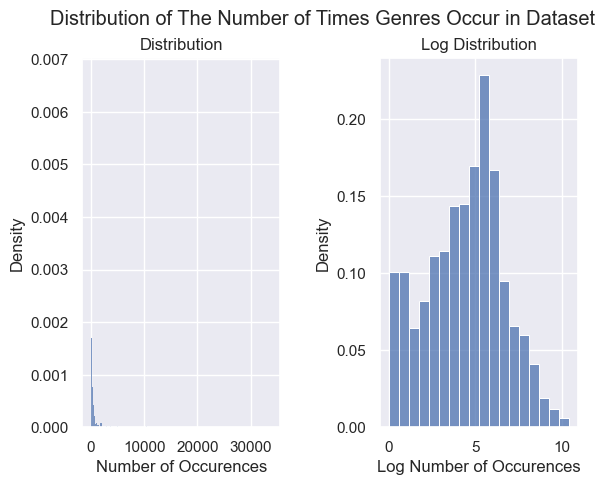

In [194]:
f, ax = plt.subplots(1, 2)
plt.subplots_adjust(hspace = 0.5, wspace = 0.5)

f1 = sns.histplot(genre_counts, stat = 'density', ax = ax[0])
f2 = sns.histplot(np.log(genre_counts), stat = 'density', ax = ax[1])

f.suptitle('Distribution of The Number of Times Genres Occur in Dataset')
f1.set(title = 'Distribution', xlabel = 'Number of Occurences')
f2.set(title = 'Log Distribution', xlabel = 'Log Number of Occurences')

<h3>Remove Uncommon Classes</h3>

In [169]:
all_genres = all_genres[all_genres.apply(lambda s: s.genres in common_genres.index, axis = 1)]

In [170]:
x = all_genres['desc']
y = all_genres['genres']

<h2>Text Processing</h2>

In [66]:
shuffle = StratifiedShuffleSplit(y, test_size = 0.8, random_state = 42)

In [69]:
for train_index, test_index in shuffle:
    print("TRAIN:", train_index, "TEST:", test_index)
    X_train, X_test = X[train_index], X[test_index]
    y_train, y_test = y[train_index], y[test_index]

TypeError: 'StratifiedShuffleSplit' object is not iterable

In [ ]:
x_test, y_test, x_train, y_train = train_test_split(x, y, random_state = 42, stratify 

In [15]:
count_vect = CountVectorizer()
X_counts = count_vect.fit_transform(x_test.desc)

X_counts.shape

(85485, 304735)

In [29]:
tf = TfidfTransformer(use_idf = False).fit_transform(X_counts)
X_tf.shape

(85485, 304735)

In [23]:
tf = TfidfTransformer(use_idf = False)
X_tf = tf.transformer.transform(X_tf)

X_tf.shape

AttributeError: 'TfidfTransformer' object has no attribute 'transformer'